# MLPRegressor

In [3]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import sklearn.linear_model as lm
from sklearn import datasets, linear_model
import matplotlib.pyplot as plt

from sklearn.neural_network import MLPRegressor
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV

# Zad.

Proszę narysować wykres dowolnej funkcji na odcinku $[0,3]$.

Będzie to model, który będziemy chcieli znaleźć.

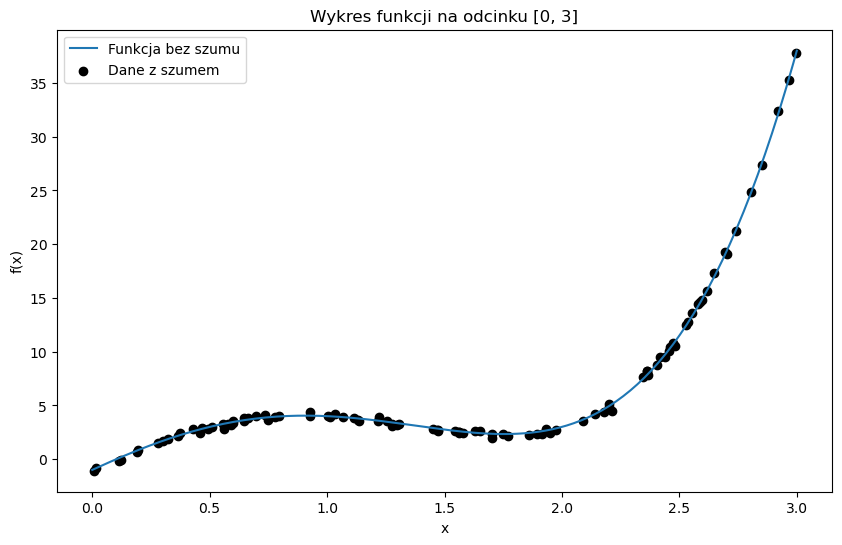

In [4]:
f = lambda x: ((x*2-1)*(x**2-2)*(x-2)+3)
x_tr = np.linspace(0, 3, 200)
y_tr = f(x_tr)
x = stats.uniform(0,3).rvs(100)
y = f(x) + stats.norm(0,0.2).rvs(len(x))

plt.figure(figsize=(10, 6))
plt.plot(x_tr, y_tr, label="Funkcja bez szumu")
plt.scatter(x, y, color="black", label="Dane z szumem")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.legend()
plt.title("Wykres funkcji na odcinku [0, 3]")
plt.show()

# Zadanie
Wykonaj regresję z różnymi parametrami.

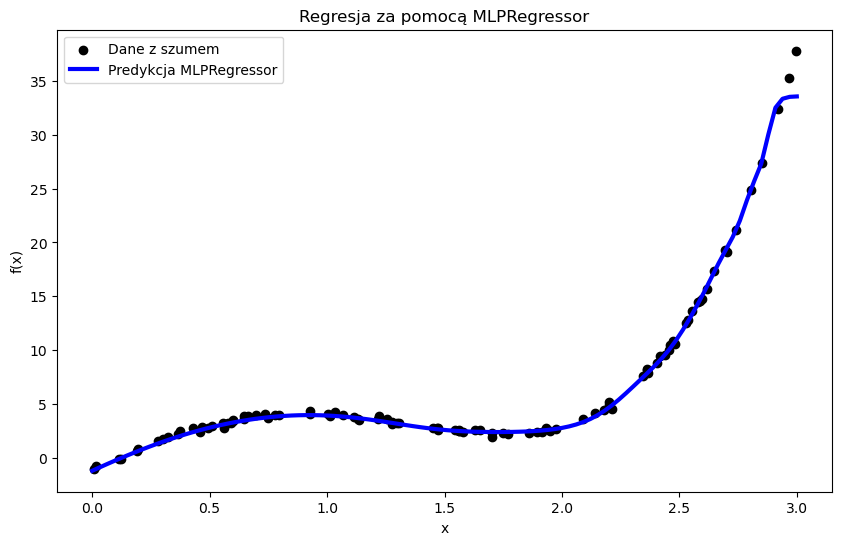

In [5]:
x=np.vstack(x)
x_plot = np.linspace(0, 3, 100).reshape(-1, 1)


MLP = MLPRegressor(
    hidden_layer_sizes=(100, 50, 10),
    activation="tanh",
    max_iter=50000,
    batch_size=20,
    learning_rate_init=0.001,
    learning_rate="adaptive",
    solver="adam",
)
MLP.fit(x, y)

plt.figure(figsize=(10, 6))
plt.scatter(x, y, color="black", label="Dane z szumem")
plt.plot(
    x_plot,
    MLP.predict(x_plot),
    color="blue",
    linewidth=3,
    label="Predykcja MLPRegressor",
)
plt.xlabel("x")
plt.ylabel("f(x)")
plt.legend()
plt.title("Regresja za pomocą MLPRegressor")
plt.show()

In [6]:
from sklearn import  metrics

r2_score = metrics.r2_score(y, MLP.predict(x))
print(f"R2 score: {r2_score}")

R2 score: 0.995221442338885


# Zad. 
Wykonaj walidecję krzyżową.

In [7]:
from sklearn.model_selection import cross_val_score

cross_val_scores = cross_val_score(MLP, x, y, cv=5, scoring="r2")
print("Cross-validation R2 scores:", cross_val_scores)
print("Mean cross-validation R2 score:", cross_val_scores.mean())

Cross-validation R2 scores: [0.99407797 0.93094087 0.99140075 0.95351117 0.93104732]
Mean cross-validation R2 score: 0.9601956168217948


# Zad.
wykonaj walidację krzyżową dla modelu MLPRegressor
najperw rzeba znalezc i pobrac Advertising.csv dataset 

Najlepsze parametry: {'activation': 'tanh', 'alpha': 0.01, 'batch_size': 20, 'hidden_layer_sizes': (100, 50, 10), 'learning_rate': 'adaptive', 'learning_rate_init': 0.01, 'max_iter': 5000, 'solver': 'sgd'}
R2 score: 0.9965041178963426


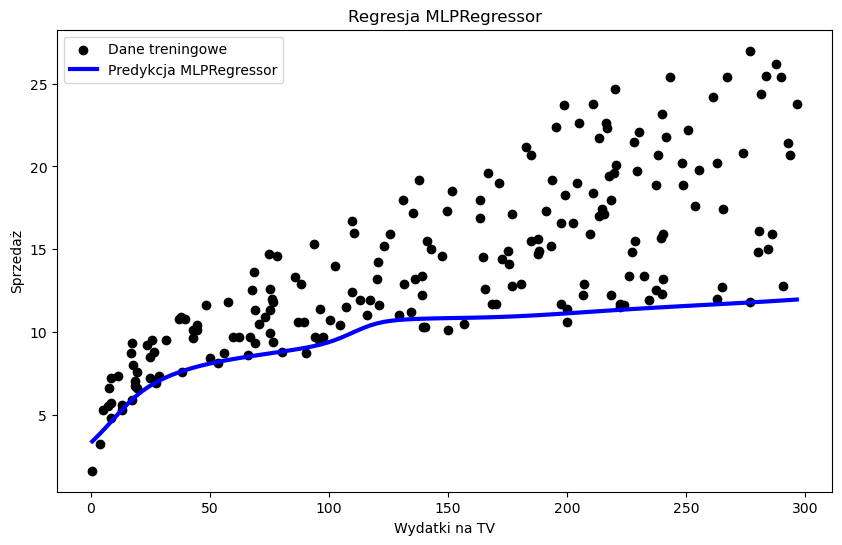

Cross-validation R2 scores: [ 0.98351017 -0.02238778 -0.02304258  0.97062688 -0.00166546]
Mean cross-validation R2 score: 0.38140824636074755


In [13]:

from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler


df_adv = pd.read_csv("Advertising.csv")


X = df_adv[["TV", "Radio", "Newspaper"]]
y = df_adv["Sales"]


scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


param_grid = {
    "hidden_layer_sizes": [(50,), (100,), (100, 50, 10)],
    "activation": ["relu", "tanh"],
    "solver": ["adam", "sgd"],
    "alpha": [0.0001, 0.001, 0.01],
    "batch_size": [10, 20, 50],
    "max_iter": [5000], 
    "learning_rate_init": [0.001, 0.01],
    "learning_rate": ["constant", "adaptive"],
}


mlp = MLPRegressor()


grid = GridSearchCV(estimator=mlp, param_grid=param_grid, cv=5, scoring="r2", n_jobs=-1)
grid.fit(X_scaled, y)


print("Najlepsze parametry:", grid.best_params_)


best_mlp = grid.best_estimator_
print("R2 score:", r2_score(y, best_mlp.predict(X_scaled)))


X_plot = np.linspace(X["TV"].min(), X["TV"].max(), 100).reshape(-1, 1)
X_new = pd.DataFrame(
    {
        "TV": X_plot.flatten(),
        "Radio": np.zeros_like(X_plot.flatten()),
        "Newspaper": np.zeros_like(X_plot.flatten()),
    }
)
X_new_scaled = scaler.transform(X_new)
y_pred = best_mlp.predict(X_new_scaled)

plt.figure(figsize=(10, 6))
plt.scatter(X["TV"], y, color="black", label="Dane treningowe")
plt.plot(X_plot, y_pred, color="blue", linewidth=3, label="Predykcja MLPRegressor")
plt.xlabel("Wydatki na TV")
plt.ylabel("Sprzedaż")
plt.title("Regresja MLPRegressor")
plt.legend()
plt.show()


cross_val_scores = cross_val_score(best_mlp, X_scaled, y, cv=5, scoring="r2")
print("Cross-validation R2 scores:", cross_val_scores)
print("Mean cross-validation R2 score:", cross_val_scores.mean())

In [18]:
from sklearn import  metrics
metrics.r2_score(y_true= y, y_pred= grid.best_estimator_.predict(X_scaled))


0.9965041178963426